In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer
import re
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [26]:
dataset=pd.read_csv('IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [27]:
dataset.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [29]:
label_encoder = LabelEncoder()
dataset['sentiment'] = label_encoder.fit_transform(dataset['sentiment'])

In [30]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [31]:
dataset.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [32]:
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

lemmatized_corpus = []
for review in dataset['review'][:50000]:
    review = re.sub(r'<.*?>|[^a-zA-Z]', ' ', review)
    review = review.lower().split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in stop_words]
    lemmatized_corpus.append(' '.join(review))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
lemmatized_vocab_size = len(set(' '.join(lemmatized_corpus).split()))
print(f"Vocabulary size after lemmatization: {lemmatized_vocab_size}")

lemmatized_word_freq = Counter(' '.join(lemmatized_corpus).split())
for word, freq in lemmatized_word_freq.most_common(10):
    print(f"{word}: {freq}")
top_30_lemmatized = lemmatized_word_freq.most_common(30)

Vocabulary size after lemmatization: 89817
movie: 103281
film: 93463
one: 55450
like: 41132
time: 31470
good: 29868
character: 28361
story: 25276
even: 24873
get: 24658


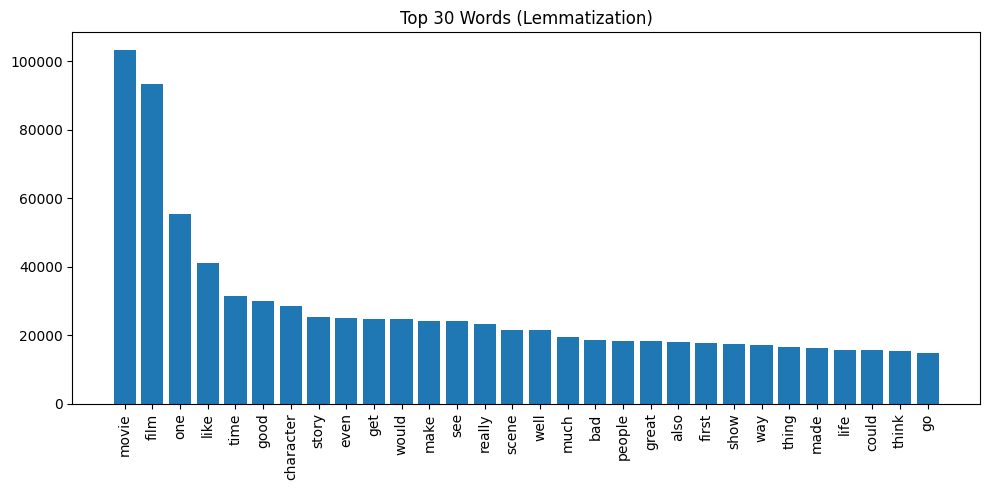

In [34]:
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_30_lemmatized))
plt.title("Top 30 Words (Lemmatization)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

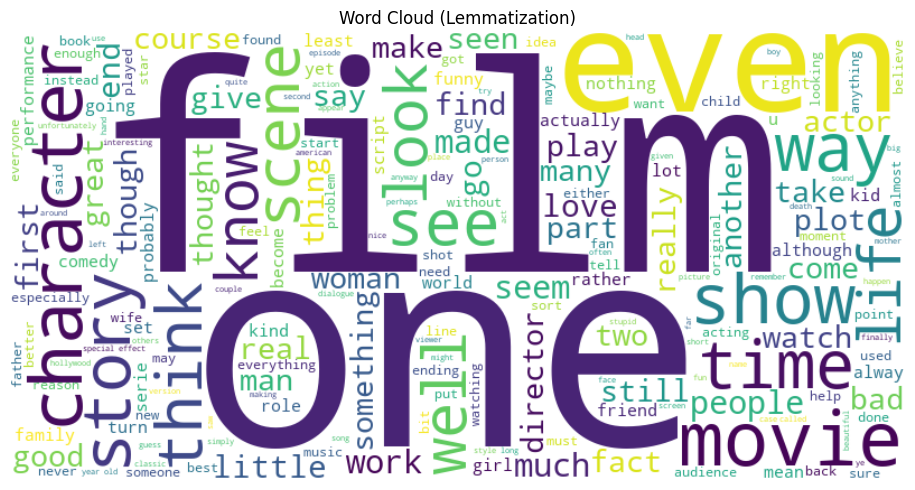

In [35]:
lemmatized_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(lemmatized_corpus))

plt.figure(figsize=(10, 5))
plt.imshow(lemmatized_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (Lemmatization)")
plt.tight_layout()
plt.show()

In [36]:
print("Analysis:")
print(f"The vocabulary size after lemmatization is {lemmatized_vocab_size}.")
print("Lemmatization retains more meaningful word forms, leading to a richer vocabulary.")
print("The word cloud and bar plot show that lemmatization preserves diverse and interpretable words.")

Analysis:
The vocabulary size after lemmatization is 89817.
Lemmatization retains more meaningful word forms, leading to a richer vocabulary.
The word cloud and bar plot show that lemmatization preserves diverse and interpretable words.
